In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
from keras.datasets import mnist
from IPython.display import Image as IPImage

from neuralnetlib.preprocessing import one_hot_encode, MinMaxScaler
from neuralnetlib.models import Sequential, GAN
from neuralnetlib.layers import Input, Dense
from neuralnetlib.optimizers import Adam
from neuralnetlib.callbacks import EarlyStopping, LearningRateScheduler

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_classes = np.unique(y_train).shape[0]

# Concatenate train and test data
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

# Flatten images
X = X.reshape(X.shape[0], -1)

# Normalize pixel values
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# Labels to categorical 
y = one_hot_encode(y, n_classes)

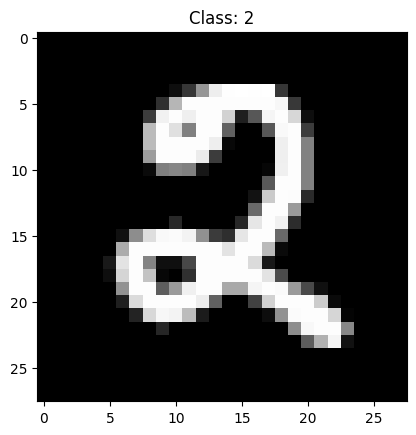

In [3]:
i = random.randint(0,len(X) - 1)
plt.imshow(X[i].reshape(28,28), cmap='gray')
plt.title('Class: ' + str(np.argmax(y[i])))
plt.show()

In [4]:
noise_dim = 100

generator = Sequential(n_classes=n_classes, random_state=42)
generator.add(Input(noise_dim + n_classes))
generator.add(Dense(256, activation='leakyrelu'))
generator.add(Dense(784, activation='tanh'))

In [5]:
discriminator = Sequential(n_classes=n_classes, random_state=42)
discriminator.add(Input(784 + n_classes))
discriminator.add(Dense(256, activation='leakyrelu'))
discriminator.add(Dense(1, activation='sigmoid'))

In [6]:
gan = GAN(latent_dim=noise_dim, n_classes=n_classes)

gan.compile(
    generator,
    discriminator,
    generator_optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
    discriminator_optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
    loss_function='bce',
    verbose=True
)

Inferred image dimensions: 28x28
GAN(latent_dim=100, gradient_clip_threshold=0.1, enable_padding=False, padding_size=32, random_state=1733879650923236900)
-------------------------------------------------
Generator:
Sequential(gradient_clip_threshold=5.0, enable_padding=False, padding_size=32, random_state=42)
-------------------------------------------------
Layer 1: Input(input_shape=(110,))
Layer 2: Dense(units=256)
Layer 3: Activation(LeakyReLU)
Layer 4: Dense(units=784)
Layer 5: Activation(Tanh)
-------------------------------------------------
Loss function: BinaryCrossentropy
Optimizer: Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999, epsilon=1e-08, clip_norm=None, clip_value=None)
-------------------------------------------------
-------------------------------------------------
Discriminator:
Sequential(gradient_clip_threshold=5.0, enable_padding=False, padding_size=32, random_state=42)
-------------------------------------------------
Layer 1: Input(input_shape=(794,))
La

In [7]:
history = gan.fit(X,
                  y,
                 epochs=100,
                 batch_size=64,
                 plot_generated=True,
                 visualization_grid=(n_classes, 8),
                 callbacks=[LearningRateScheduler(schedule='warmup_cosine', initial_learning_rate=0.0002)]
                 )   

[==============================] 100% Epoch 1/100 - d_loss: 0.3479 - g_loss: 1.8818 -  - 72.37s
[==============================] 100% Epoch 2/100 - d_loss: 0.4688 - g_loss: 1.3902 -  - 76.07s
[==============================] 100% Epoch 3/100 - d_loss: 0.5721 - g_loss: 1.1589 -  - 76.07s
[==============================] 100% Epoch 4/100 - d_loss: 0.6016 - g_loss: 1.0896 -  - 75.87s
[==============================] 100% Epoch 5/100 - d_loss: 0.6014 - g_loss: 0.9888 -  - 78.18s
[==============================] 100% Epoch 6/100 - d_loss: 0.5408 - g_loss: 0.8300 -  - 78.20s
[==============================] 100% Epoch 7/100 - d_loss: 0.4833 - g_loss: 0.7332 -  - 78.40s
[==============================] 100% Epoch 8/100 - d_loss: 0.4444 - g_loss: 0.7770 -  - 75.81s
[==============================] 100% Epoch 9/100 - d_loss: 0.4166 - g_loss: 0.8929 -  - 76.14s
[==============================] 100% Epoch 10/100 - d_loss: 0.3976 - g_loss: 1.0105 -  - 76.26s
[==============================] 100% E

In [8]:
image_files = [f for f in os.listdir() if f.endswith('.png') and f.startswith('video')]
image_files.sort(key=lambda x: int(x.replace('video', '').replace('.png', '')))

images = [Image.open(img) for img in image_files]

if images:
    images[0].save('output_4.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

print("GIF 'output.gif' succesffuly created!")

GIF 'output.gif' succesffuly created!


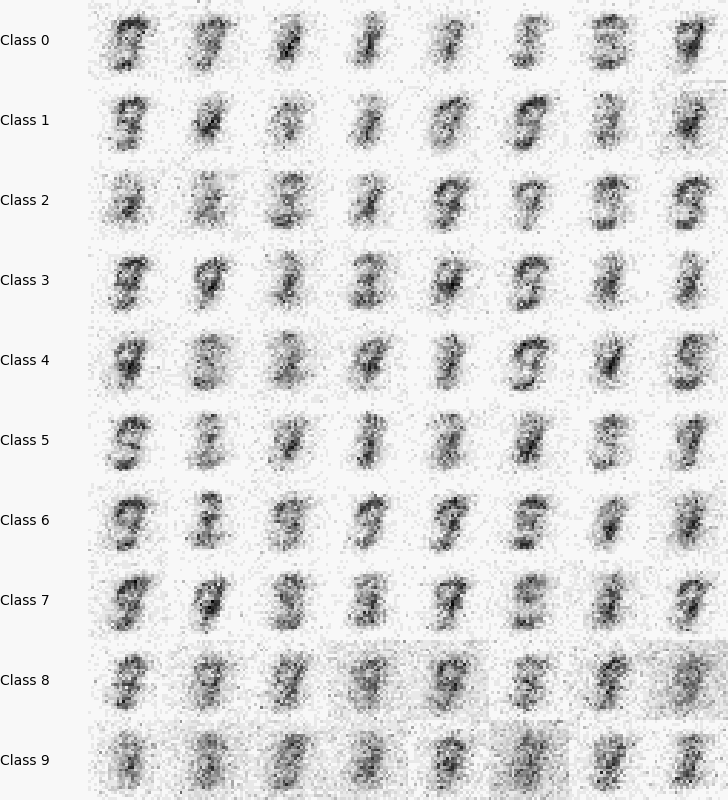

In [9]:
IPImage(filename="output_4.gif")

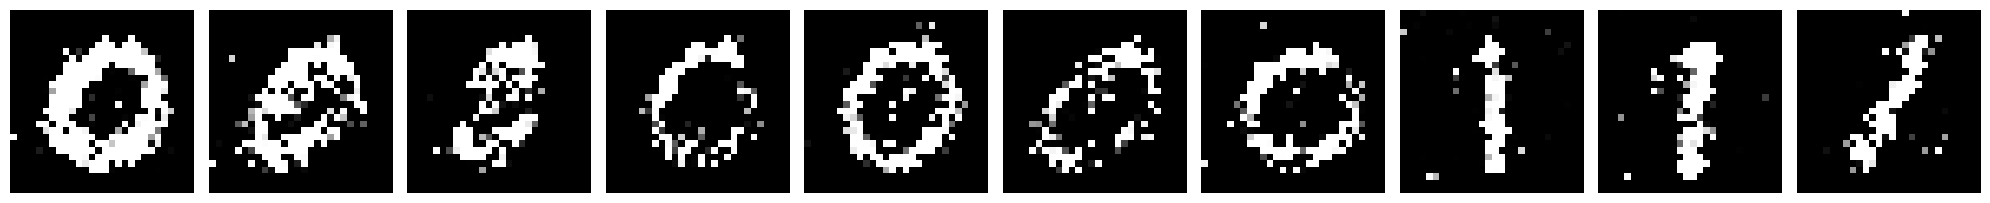

In [ ]:
labels = np.array([9] * 10)
samples = gan.predict(n_samples=10, labels=labels)

plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
